In [2]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import dates as mdates
from matplotlib.dates import date2num
from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import os
import matplotlib.patches as mpatches
from glob import glob
from ast import literal_eval
register_matplotlib_converters()
from matplotlib.cm import get_cmap
from sklearn.metrics import r2_score

In [8]:
# Top level directory containing csv files:
csv_dir = './New folder'

In [9]:
# Use os.walk to search for all csv files in csv_dir:
all_csv_files = [
    # Join the directory name and file name ... :
    os.sep.join([csv_path, csv_file])
    # For each directory found by os.walk() ... :
    for csv_path, csv_subdirs, csv_files in os.walk(csv_dir)
    # for each file found by os.walk():
    for csv_file in csv_files
    # If the file name ends with '.csv':
    if csv_file.endswith('.csv')
    ]

print(all_csv_files)

['./New folder\\C12D6AD99B2C_12_Oct_2022_13_32_12.csv', './New folder\\C975F1857F4C_12_Oct_2022_12_43_51.csv', './New folder\\CB8BEB2DCB1C_12_Oct_2022_13_22_19.csv', './New folder\\CC0414C21101_12_Oct_2022_13_55_44.csv', './New folder\\CC9D1F51C83C_12_Oct_2022_12_58_10.csv', './New folder\\D0C67F720157_12_Oct_2022_13_35_20.csv', './New folder\\D3A569AB4DFB_12_Oct_2022_14_45_22.csv', './New folder\\D45A59D73DBC_12_Oct_2022_11_55_33PHONE5.csv', './New folder\\D479F59DF30E_12_Oct_2022_12_11_49.csv', './New folder\\D8800A1914FA_12_Oct_2022_12_50_00.csv', './New folder\\D8A75CE01430_12_Oct_2022_13_28_53.csv', './New folder\\DB3F1059BEAB_12_Oct_2022_14_40_51.csv', './New folder\\DBC53C42874B_12_Oct_2022_14_47_45.csv', './New folder\\DBF0F558D2C2_12_Oct_2022_12_40_29.csv', './New folder\\DDF76C77E763_12_Oct_2022_13_05_57.csv', './New folder\\DEB0A82ED749_12_Oct_2022_13_14_22.csv', './New folder\\E35DC7583682_12_Oct_2022_13_17_16.csv', './New folder\\E802E76521B9_12_Oct_2022_14_49_32.csv', './

In [10]:
csv_files = {}
# Loop through all of the csv files:
for csv_file in all_csv_files:
    # Get the MAC address from the file name by splitting the file path first by file
    # system separator, and then by underscore:
    mac_addr = csv_file.split(os.sep)[-1].split('_')[0]
    # If we have not seen this MAC address before, add an entry to csv_files dict:
    if mac_addr not in list(csv_files.keys()):
        csv_files[mac_addr] = []
    # Add this file to list for the sensor:
    csv_files[mac_addr].append(csv_file)

print(csv_files)

{'C12D6AD99B2C': ['./New folder\\C12D6AD99B2C_12_Oct_2022_13_32_12.csv'], 'C975F1857F4C': ['./New folder\\C975F1857F4C_12_Oct_2022_12_43_51.csv'], 'CB8BEB2DCB1C': ['./New folder\\CB8BEB2DCB1C_12_Oct_2022_13_22_19.csv'], 'CC0414C21101': ['./New folder\\CC0414C21101_12_Oct_2022_13_55_44.csv'], 'CC9D1F51C83C': ['./New folder\\CC9D1F51C83C_12_Oct_2022_12_58_10.csv'], 'D0C67F720157': ['./New folder\\D0C67F720157_12_Oct_2022_13_35_20.csv'], 'D3A569AB4DFB': ['./New folder\\D3A569AB4DFB_12_Oct_2022_14_45_22.csv'], 'D45A59D73DBC': ['./New folder\\D45A59D73DBC_12_Oct_2022_11_55_33PHONE5.csv'], 'D479F59DF30E': ['./New folder\\D479F59DF30E_12_Oct_2022_12_11_49.csv'], 'D8800A1914FA': ['./New folder\\D8800A1914FA_12_Oct_2022_12_50_00.csv'], 'D8A75CE01430': ['./New folder\\D8A75CE01430_12_Oct_2022_13_28_53.csv'], 'DB3F1059BEAB': ['./New folder\\DB3F1059BEAB_12_Oct_2022_14_40_51.csv'], 'DBC53C42874B': ['./New folder\\DBC53C42874B_12_Oct_2022_14_47_45.csv'], 'DBF0F558D2C2': ['./New folder\\DBF0F558D2C2

In [16]:
all_data = []
# Init a count for sensor IDs:
sensor_count = 1

# While reading the data, we're going to store min and max dates, to get
# the time range for which we have data for all sensors:
min_date = None
max_date = None

# For each MAC address in the csv_files:
for mac_addr in list(csv_files.keys()):
    # Read all the csv files for this MAC address:
    mac_data = pd.concat([
        pd.read_csv(csv_file, parse_dates=['Date'], index_col='Date', dayfirst=True)
        for csv_file in csv_files[mac_addr]
    ])   
    # Update min date for data:
    if not min_date:
        min_date = mac_data.index.min()
    elif mac_data.index.min() > min_date:
        min_date = mac_data.index.min()
    # Update mac date for data:
    if not max_date:
        max_date = mac_data.index.max()
    elif mac_data.index.max() < max_date:
        max_date = mac_data.index.max()
# ***
    # Add a sensor ID column to data frame:
    mac_data['Sensor ID'] = sensor_count 
    # Store the data frame:
    all_data.append(mac_data)
    # Increment the sensor ID count:
    sensor_count += 1
    # Merge all the data frames:
all_data = pd.concat(all_data)

all_data

,"VOC, ppm",AQS,"Temperature, °C","Humidity, %","Pressure, mbar","PM1, ug/m3","PM2.5, ug/m3","PM10, ug/m3",Latitude,Longitude,Sensor_ID,Sensor ID
Date,,,,,,,,,,,,
2022-09-18 06:20:00,0.064,96.0,11.0,59.0,1011.13,1.0,1.0,2.0,NaN,NaN,Atty40,1
2022-09-18 06:21:00,0.064,96.0,11.0,59.0,1011.13,1.0,1.0,2.0,NaN,NaN,Atty40,1
2022-09-18 06:22:00,0.067,95.0,11.0,59.0,1011.20,1.0,2.0,2.0,NaN,NaN,Atty40,1
2022-09-18 06:23:00,0.070,95.0,11.0,59.0,1011.13,1.0,1.0,2.0,NaN,NaN,Atty40,1
2022-09-18 06:24:00,0.062,96.0,11.0,59.0,1011.17,1.0,2.0,2.0,NaN,NaN,Atty40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18 06:09:00,0.076,95.0,13.0,55.0,1010.89,1.0,2.0,3.0,NaN,NaN,28,31
2022-09-18 06:08:00,0.076,95.0,13.0,55.0,1010.88,1.0,1.0,3.0,NaN,NaN,28,31
2022-09-18 06:07:00,0.077,95.0,13.0,55.0,1010.95,1.0,2.0,3.0,NaN,NaN,28,31


In [17]:
data = all_data[
    (all_data.index >= min_date) &
    (all_data.index <= max_date)
]

# Check how many records we have for each sensor ID:
for sensor_id in range(1, sensor_count):
    print(
        'Sensor ID: {0}, record count: {1}'.format(
            sensor_id, len(data['Sensor ID'] == sensor_id)
        )
    )

data

Sensor ID: 1, record count: 314359
Sensor ID: 2, record count: 314359
Sensor ID: 3, record count: 314359
Sensor ID: 4, record count: 314359
Sensor ID: 5, record count: 314359
Sensor ID: 6, record count: 314359
Sensor ID: 7, record count: 314359
Sensor ID: 8, record count: 314359
Sensor ID: 9, record count: 314359
Sensor ID: 10, record count: 314359
Sensor ID: 11, record count: 314359
Sensor ID: 12, record count: 314359
Sensor ID: 13, record count: 314359
Sensor ID: 14, record count: 314359
Sensor ID: 15, record count: 314359
Sensor ID: 16, record count: 314359
Sensor ID: 17, record count: 314359
Sensor ID: 18, record count: 314359
Sensor ID: 19, record count: 314359
Sensor ID: 20, record count: 314359
Sensor ID: 21, record count: 314359
Sensor ID: 22, record count: 314359
Sensor ID: 23, record count: 314359
Sensor ID: 24, record count: 314359
Sensor ID: 25, record count: 314359
Sensor ID: 26, record count: 314359
Sensor ID: 27, record count: 314359
Sensor ID: 28, record count: 314359
S

,"VOC, ppm",AQS,"Temperature, °C","Humidity, %","Pressure, mbar","PM1, ug/m3","PM2.5, ug/m3","PM10, ug/m3",Latitude,Longitude,Sensor_ID,Sensor ID
Date,,,,,,,,,,,,
2022-09-27 16:36:00,0.100,94.0,14.0,41.0,989.19,1.0,2.0,3.0,NaN,NaN,Atty40,1
2022-09-27 16:37:00,0.098,94.0,14.0,41.0,989.16,1.0,2.0,4.0,NaN,NaN,Atty40,1
2022-09-27 16:38:00,0.094,94.0,14.0,41.0,989.17,1.0,2.0,3.0,NaN,NaN,Atty40,1
2022-09-27 16:39:00,0.099,94.0,14.0,42.0,989.15,1.0,2.0,4.0,NaN,NaN,Atty40,1
2022-09-27 16:40:00,0.101,93.0,14.0,41.0,989.14,1.0,2.0,4.0,NaN,NaN,Atty40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-27 16:40:00,0.075,95.0,15.0,41.0,989.09,1.0,1.0,3.0,NaN,NaN,28,31
2022-09-27 16:39:00,0.078,95.0,15.0,41.0,989.11,1.0,2.0,3.0,NaN,NaN,28,31
2022-09-27 16:38:00,0.082,95.0,15.0,40.0,989.12,1.0,2.0,3.0,NaN,NaN,28,31


Text(0.5, 0, 'Sensor ID')

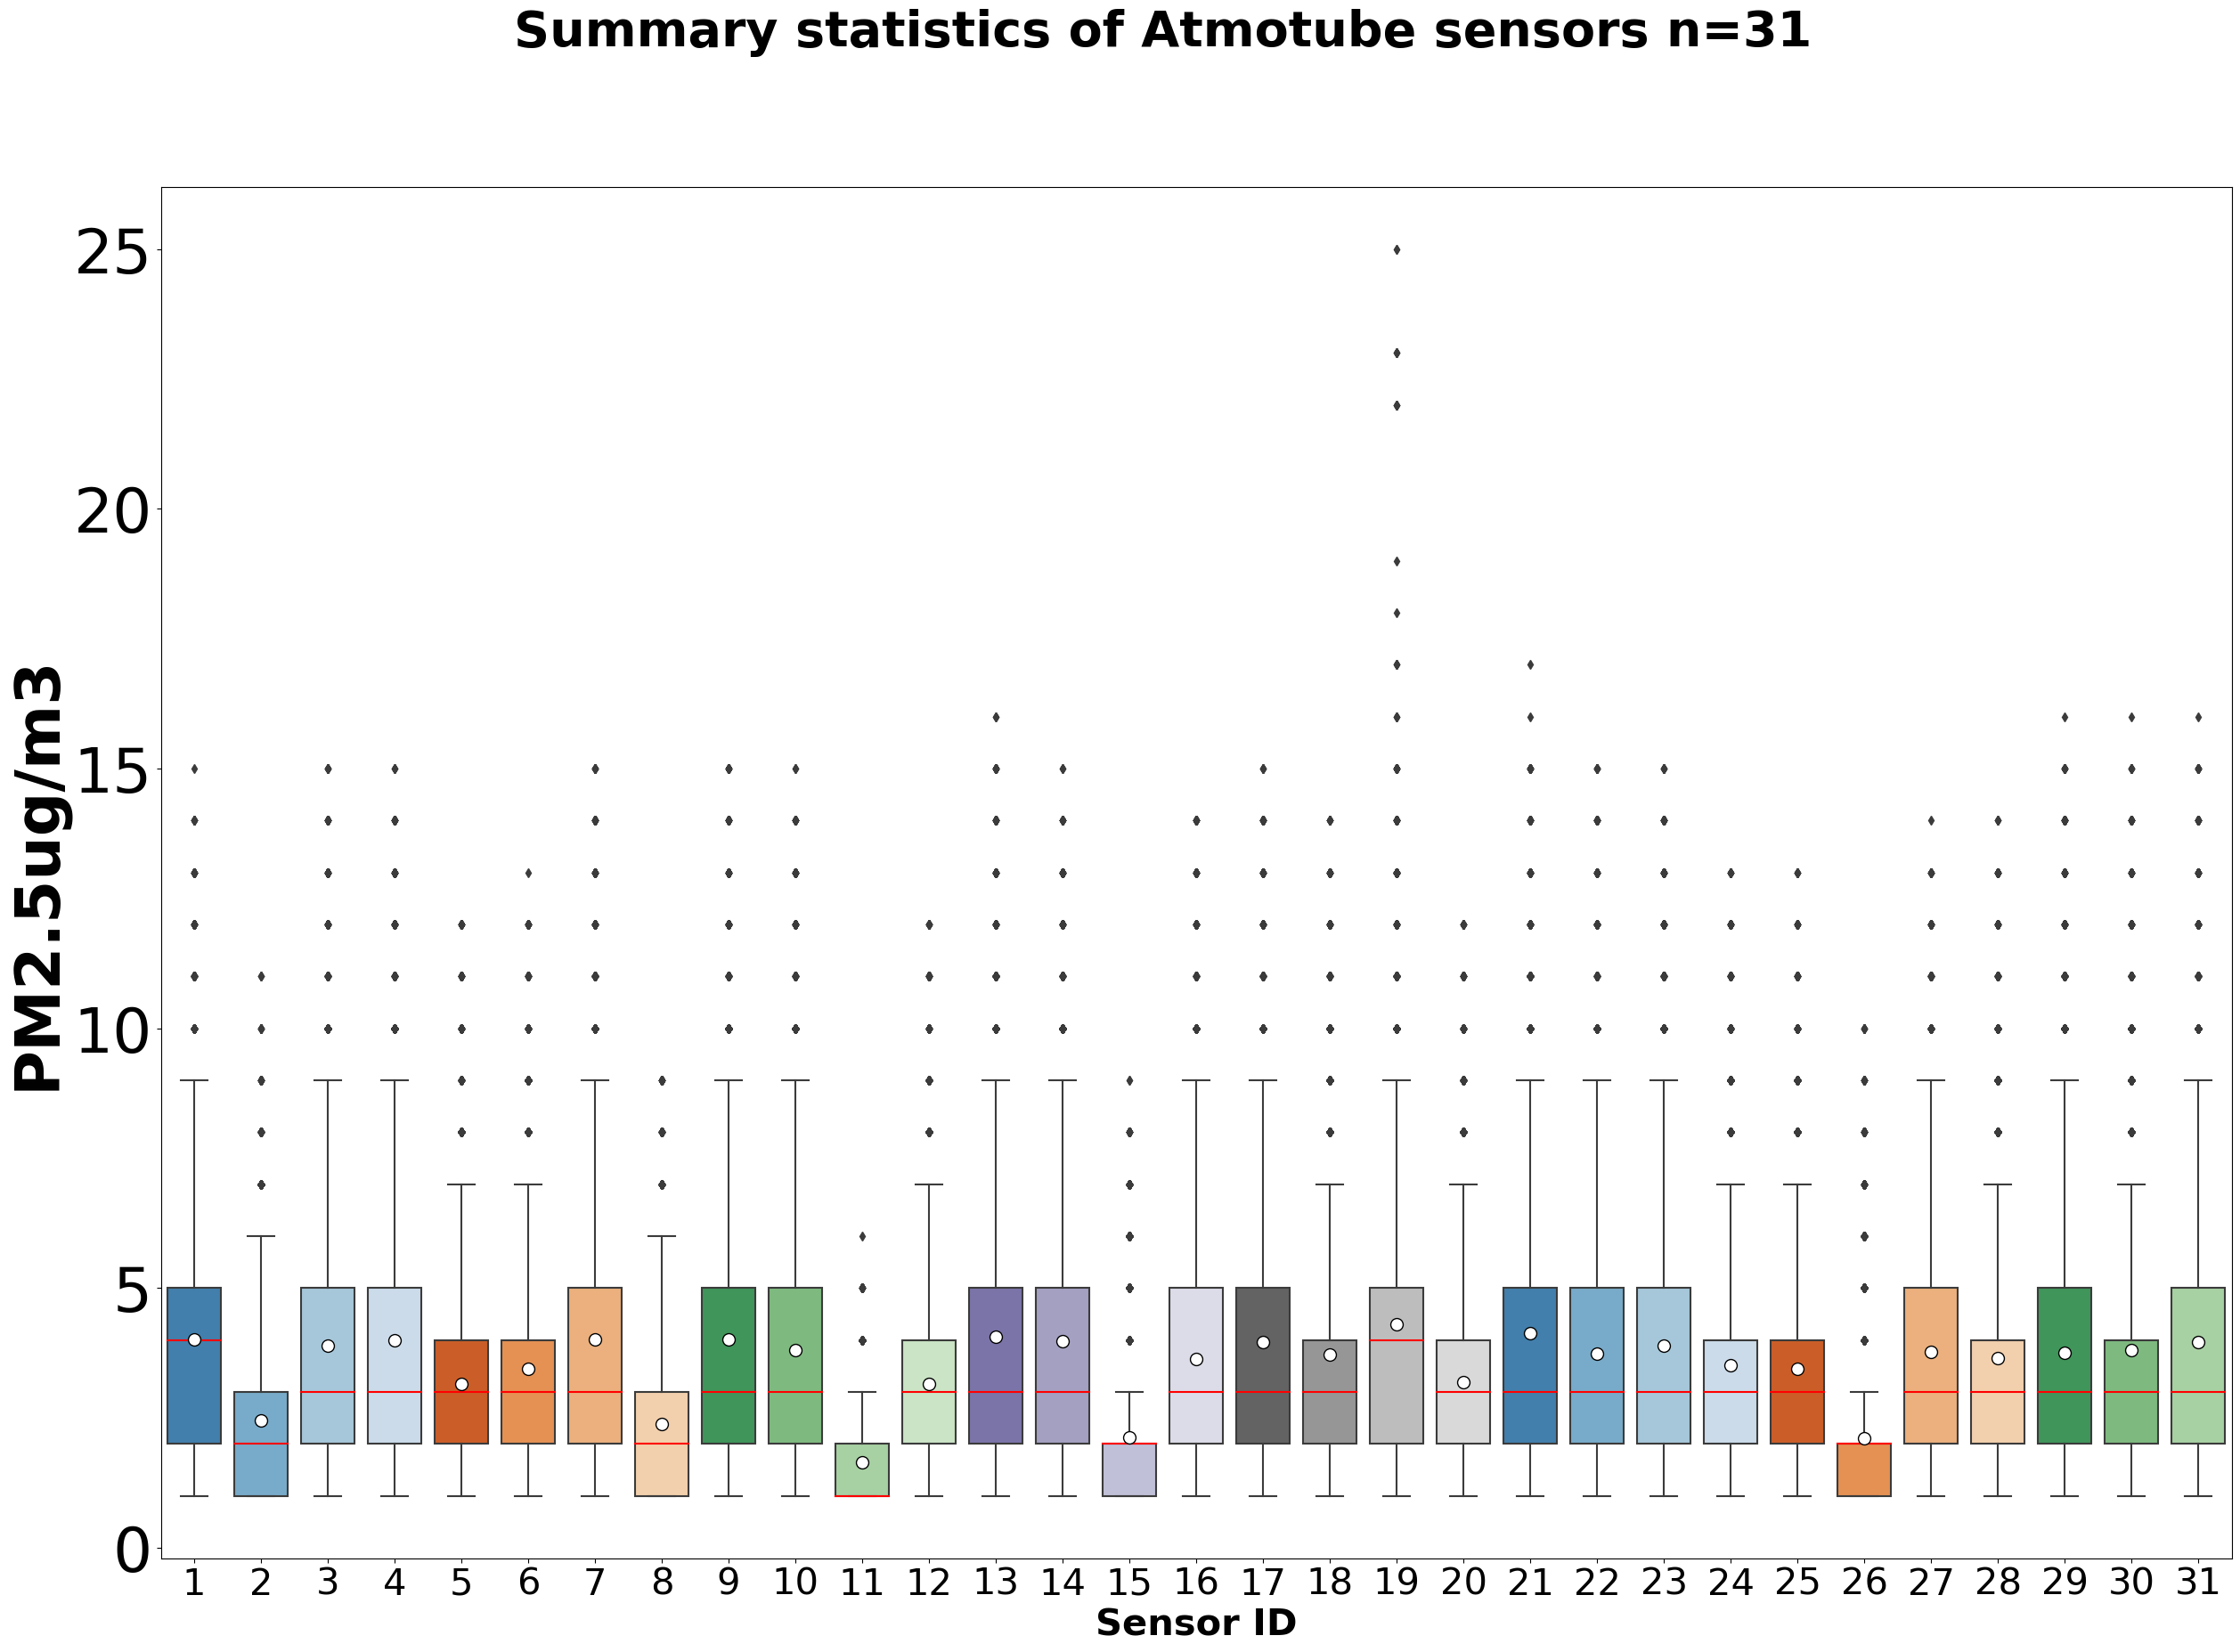

In [18]:
plt.rcParams["figure.figsize"] = [60, 25]
custom_palette = sns.color_palette("tab20c", 31)

fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(data=data, x='Sensor ID', y=data['PM2.5, ug/m3'], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, palette=custom_palette, medianprops=dict(color="red", alpha=1.0))
plt.xticks(fontsize=30)
plt.yticks(fontsize=50)
plt.suptitle('Summary statistics of Atmotube sensors n=31', fontsize=40, weight='bold')
plt.ylabel('PM2.5ug/m3', fontsize=50, weight='bold')
plt.xlabel('Sensor ID', fontsize=30, weight='bold')
#plt.savefig('BoxplotallAttytubes.png', dpi= 300)